In [1]:
import sys
sys.path.append('/Users/xichen/Documents/paper2-traj-pred/carla-data')
sys.path.append('/Users/xichen/Documents/paper2-traj-pred/carla-data/maps/lanelet2')

In [2]:
import lane_segment, load_xml

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
roads = load_xml.load_lane_segments_from_xml("Town03.osm")

In [7]:
roads[1006].l_bound

array([[ 97.29896 , 196.809596],
       [140.69526 , 195.719041]])

In [11]:
roads.keys()

dict_keys([1006, 1013, 1020, 1027, 1034, 1041, 1048, 1055, 1174, 1293, 1414, 1535, 1542, 1549, 1556, 1563, 1570, 1577, 1584, 1591, 1598, 1605, 1612, 1619, 1626, 1633, 1640, 1647, 1654, 1661, 1668, 1675, 1682, 1689, 1696, 1703, 1714, 1725, 1734, 1743, 1750, 1757, 1766, 1775, 1782, 1789, 1796, 1803, 1810, 1817, 1824, 1831, 1986, 2139, 2146, 2153, 2160, 2167, 2246, 2323, 2330, 2337, 2346, 2355, 2362, 2369, 2376, 2383, 2390, 2397, 2404, 2411, 2418, 2425, 2432, 2439, 2446, 2453, 2460, 2467, 2474, 2481, 2488, 2495, 2502, 2509, 2516, 2523, 2532, 2541, 2548, 2555, 2562, 2569, 2576, 2583, 2590, 2597, 2638, 2679, 2686, 2693, 2700, 2707, 2714, 2721, 2728, 2735, 2742, 2749, 2756, 2763, 2770, 2777, 2784, 2791, 2798, 2805, 2812, 2849, 2856, 2863, 3008, 3015, 3022, 3029, 3036, 3223, 3410, 3597, 3784, 3791, 3798, 3805, 3812, 4051, 4290, 4529, 4768, 4775, 4782, 4789, 4796, 4883, 4970, 5055, 5140, 5147, 5154, 5161, 5168, 5175, 5182, 5313, 5444, 5451, 5458, 5465, 5472, 5479, 5486, 5493, 5500, 5547, 5606,

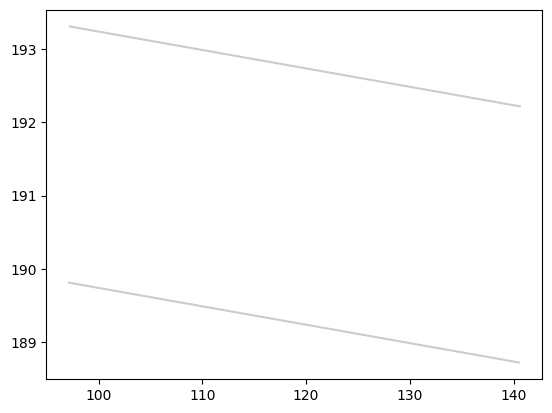

In [12]:

road_id = 1013
plt.plot(roads[road_id].l_bound[:,0], roads[road_id].l_bound[:,1], color='0.8')#, marker='o', markerfacecolor='blue', markersize=5)
plt.plot(roads[road_id].r_bound[:,0], roads[road_id].r_bound[:,1], color='0.8')#, marker='o', markerfacecolor='red', markersize=5)


In [16]:
roads[road_id].l_bound[:,0], roads[road_id].r_bound[:,0]

(array([ 97.211033, 140.607332]), array([ 97.123105, 140.519404]))

In [19]:
np.min(np.concatenate((roads[road_id].l_bound[:,0], roads[road_id].r_bound[:,0])))

97.123105

In [15]:
roads[road_id].l_bound[:,1], roads[road_id].r_bound[:,1]

(array([193.310701, 192.220146]), array([189.811805, 188.721251]))

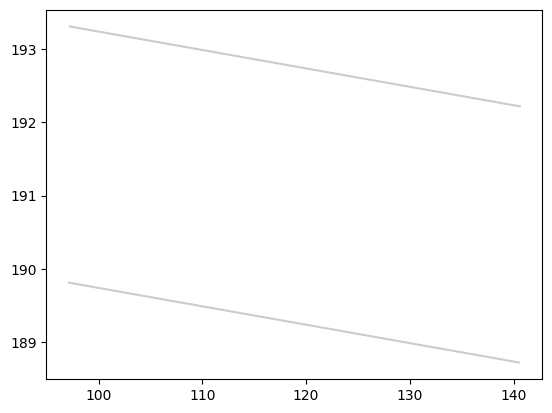

In [31]:
road_id = 1013
plt.plot(roads[road_id].l_bound[:,0], roads[road_id].l_bound[:,1], color='0.8')#, marker='o', markerfacecolor='blue', markersize=5)
plt.plot(roads[road_id].r_bound[:,0], roads[road_id].r_bound[:,1], color='0.8')#, marker='o', markerfacecolor='red', markersize=5)
def build_polygon_bboxes(roads):
    """
    roads: dict, key: road id; value field: l_bound, r_bound
    polygon_bboxes: An array of shape (K,), each array element is a NumPy array of shape (4,) representing
                        the bounding box for a polygon or point cloud.
    each road_id corresponds to a polygon_bbox
    """
    polygon_bboxes = []
    for road_id in roads.keys():
        x = np.concatenate((roads[road_id].l_bound[:,0], roads[road_id].r_bound[:,0]))
        xmin = np.min(x)
        xmax = np.max(x)
        y = np.concatenate((roads[road_id].l_bound[:,1], roads[road_id].r_bound[:,1]))
        ymin = np.min(y)
        ymax = np.max(y)
        polygon_bbox = np.array([xmin, ymin, xmax, ymax])
        polygon_bboxes.append(polygon_bbox)
    return np.array(polygon_bboxes)

In [32]:
polygon_bboxes = build_polygon_bboxes(roads)

In [35]:
polygon_bboxes

array([[  97.211033,  192.220146,  140.69526 ,  196.809596],
       [  97.123105,  188.721251,  140.607332,  193.310701],
       [  97.386888,  199.217937,  140.871115,  203.807387],
       ...,
       [ -63.216478, -195.383786,  -33.166991, -184.69534 ],
       [ -70.158971, -205.883799,  -33.140791, -192.572635],
       [ -72.473135, -209.383672,  -33.132058, -195.1984  ]])

In [72]:

polygon_bboxes.shape[0]

406

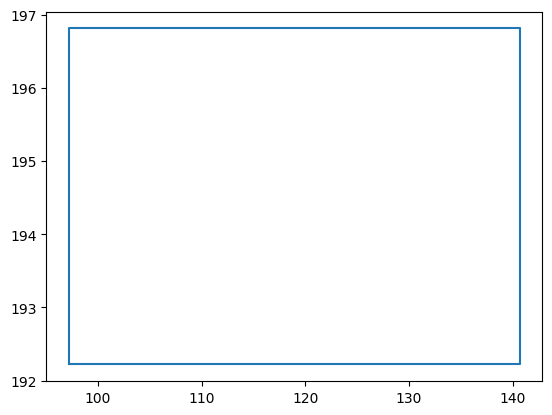

In [74]:
i=0
x = np.array([polygon_bboxes[i,0],polygon_bboxes[i,0],polygon_bboxes[i,2],polygon_bboxes[i,2],polygon_bboxes[i,0]])
y = np.array([polygon_bboxes[i,1],polygon_bboxes[i,3],polygon_bboxes[i,3],polygon_bboxes[i,1],polygon_bboxes[i,1]])
# plt.plot(polygon_bboxes[i,0], polygon_bboxes[i,1])
# polygon_bboxes[i,0], polygon_bboxes[i,3]
polygon_bboxes[i,0], polygon_bboxes[i,3]
# polygon_bboxes[i,2], polygon_bboxes[i,3])
# polygon_bboxes[i,2], polygon_bboxes[i,1]
# polygon_bboxes[i,0], polygon_bboxes[i,1]
plt.plot(x, y)

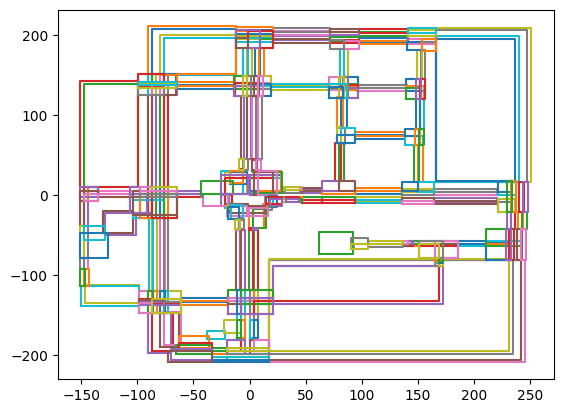

In [75]:
for i in range(polygon_bboxes.shape[0]):
    x = np.array([polygon_bboxes[i,0],polygon_bboxes[i,0],polygon_bboxes[i,2],polygon_bboxes[i,2],polygon_bboxes[i,0]])
    y = np.array([polygon_bboxes[i,1],polygon_bboxes[i,3],polygon_bboxes[i,3],polygon_bboxes[i,1],polygon_bboxes[i,1]])

    # plt.plot(polygon_bboxes[i,0], polygon_bboxes[i,1])
    # polygon_bboxes[i,0], polygon_bboxes[i,3]
    # polygon_bboxes[i,2], polygon_bboxes[i,1])
    # polygon_bboxes[i,2], polygon_bboxes[i,3]
    plt.plot(x, y)
    

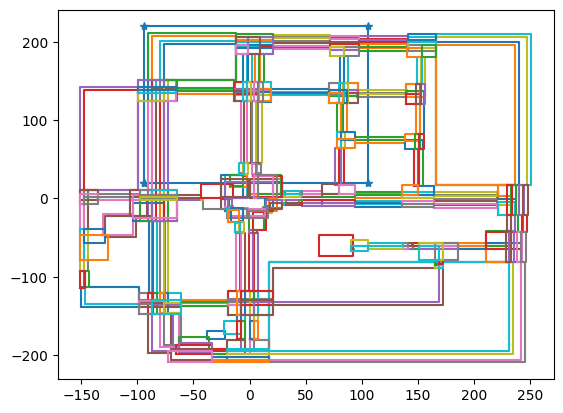

In [92]:
query_x = 5.772
query_y = 119.542
query_search_range_manhattan = 100
query_min_x = query_x - query_search_range_manhattan
query_max_x = query_x + query_search_range_manhattan
query_min_y = query_y - query_search_range_manhattan
query_max_y = query_y + query_search_range_manhattan
query_cav_x = np.array([query_min_x,query_min_x,query_max_x,query_max_x,query_min_x])
query_cav_y = np.array([query_min_y,query_max_y,query_max_y,query_min_y,query_min_y])

plt.plot(query_cav_x, query_cav_y, marker="*")

for i in range(polygon_bboxes.shape[0]):
    x = np.array([polygon_bboxes[i,0],polygon_bboxes[i,0],polygon_bboxes[i,2],polygon_bboxes[i,2],polygon_bboxes[i,0]])
    y = np.array([polygon_bboxes[i,1],polygon_bboxes[i,3],polygon_bboxes[i,3],polygon_bboxes[i,1],polygon_bboxes[i,1]])

    plt.plot(x, y)

In [30]:
def find_all_polygon_bboxes_overlapping_query_bbox(polygon_bboxes: np.ndarray, query_bbox: np.ndarray) -> np.ndarray:
    """Find all the overlapping polygon bounding boxes.
    Each bounding box has the following structure:
        bbox = np.array([x_min,y_min,x_max,y_max])
    In 3D space, if the coordinates are equal (polygon bboxes touch), then these are considered overlapping.
    We have a guarantee that the cropped image will have any sort of overlap with the zero'th object bounding box
    inside of the image e.g. along the x-dimension, either the left or right side of the bounding box lies between the
    edges of the query bounding box, or the bounding box completely engulfs the query bounding box.
    Args:
        polygon_bboxes: An array of shape (K,), each array element is a NumPy array of shape (4,) representing
                        the bounding box for a polygon or point cloud.
        query_bbox: An array of shape (4,) representing a 2d axis-aligned bounding box, with order
                    [min_x,min_y,max_x,max_y].
    Returns:
        An integer array of shape (K,) representing indices where overlap occurs.
    """
    query_min_x = query_bbox[0]
    query_min_y = query_bbox[1]

    query_max_x = query_bbox[2]
    query_max_y = query_bbox[3]

    bboxes_x1 = polygon_bboxes[:, 0]
    bboxes_x2 = polygon_bboxes[:, 2]

    bboxes_y1 = polygon_bboxes[:, 1]
    bboxes_y2 = polygon_bboxes[:, 3]

    # check if falls within range
    overlaps_left = (query_min_x <= bboxes_x2) & (bboxes_x2 <= query_max_x)
    overlaps_right = (query_min_x <= bboxes_x1) & (bboxes_x1 <= query_max_x)

    x_check1 = bboxes_x1 <= query_min_x
    x_check2 = query_min_x <= query_max_x
    x_check3 = query_max_x <= bboxes_x2
    x_subsumed = x_check1 & x_check2 & x_check3

    x_in_range = overlaps_left | overlaps_right | x_subsumed

    overlaps_below = (query_min_y <= bboxes_y2) & (bboxes_y2 <= query_max_y)
    overlaps_above = (query_min_y <= bboxes_y1) & (bboxes_y1 <= query_max_y)

    y_check1 = bboxes_y1 <= query_min_y
    y_check2 = query_min_y <= query_max_y
    y_check3 = query_max_y <= bboxes_y2
    y_subsumed = y_check1 & y_check2 & y_check3
    y_in_range = overlaps_below | overlaps_above | y_subsumed

    overlap_indxs = np.where(x_in_range & y_in_range)[0]
    return overlap_indxs

In [83]:

def get_road_ids_in_xy_bbox(
    polygon_bboxes,
    query_x: float,
    query_y: float,
    query_search_range_manhattan: float = 50.0,
):
    """
    Prune away all lane segments based on Manhattan distance. We vectorize this instead
    of using a for-loop. Get all lane IDs within a bounding box in the xy plane.
    This is a approximation of a bubble search for point-to-polygon distance.
    The bounding boxes of small point clouds (lane centerline waypoints) are precomputed in the map.
    We then can perform an efficient search based on manhattan distance search radius from a
    given 2D query point.
    We pre-assign lane segment IDs to indices inside a big lookup array, with precomputed
    hallucinated lane polygon extents.
    Args:
        query_x: representing x coordinate of xy query location
        query_y: representing y coordinate of xy query location
        city_name: either 'MIA' for Miami or 'PIT' for Pittsburgh
        query_search_range_manhattan: search radius along axes
    Returns:
        lane_ids: lane segment IDs that live within a bubble
    """
    query_min_x = query_x - query_search_range_manhattan
    query_max_x = query_x + query_search_range_manhattan
    query_min_y = query_y - query_search_range_manhattan
    query_max_y = query_y + query_search_range_manhattan

    overlap_indxs = find_all_polygon_bboxes_overlapping_query_bbox(
        polygon_bboxes,
        np.array([query_min_x, query_min_y, query_max_x, query_max_y]),
    )

    if len(overlap_indxs) == 0:
        return []

    neighborhood_road_ids = []
    for overlap_idx in overlap_indxs:
        lane_segment_id = list(roads.keys())[overlap_idx]
        neighborhood_road_ids.append(lane_segment_id)

    return neighborhood_road_ids

In [105]:
cav_x = 5.772
cav_y = 119.542
cv_range = 50
neighborhood_road_ids = get_road_ids_in_xy_bbox(polygon_bboxes, cav_x, cav_y, cv_range)


In [106]:
len(neighborhood_road_ids)

30

In [89]:
neighborhood_road_ids

[1174,
 1293,
 1414,
 1535,
 1810,
 1817,
 1824,
 1831,
 2362,
 2369,
 2376,
 2383,
 2390,
 2397,
 2404,
 2411,
 10561,
 10568,
 10621,
 10662,
 10703,
 10756,
 10795,
 10848,
 10899,
 10940,
 10947,
 10954,
 10961,
 10968]

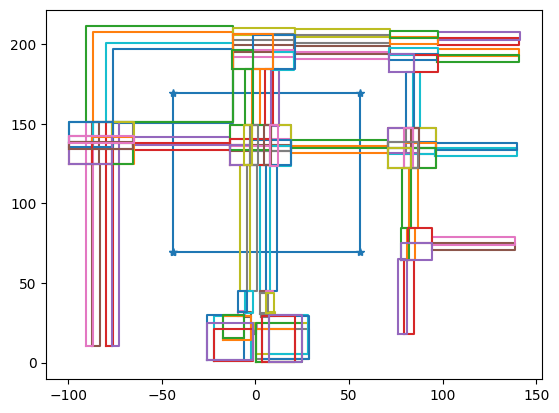

In [100]:
query_x = 5.772
query_y = 119.542
query_search_range_manhattan = 50
query_min_x = query_x - query_search_range_manhattan
query_max_x = query_x + query_search_range_manhattan
query_min_y = query_y - query_search_range_manhattan
query_max_y = query_y + query_search_range_manhattan
query_cav_x = np.array([query_min_x,query_min_x,query_max_x,query_max_x,query_min_x])
query_cav_y = np.array([query_min_y,query_max_y,query_max_y,query_min_y,query_min_y])

plt.plot(query_cav_x, query_cav_y, marker="*")

for id in neighborhood_road_ids:
    i = list(roads.keys()).index(id)
    x = np.array([polygon_bboxes[i,0],polygon_bboxes[i,0],polygon_bboxes[i,2],polygon_bboxes[i,2],polygon_bboxes[i,0]])
    y = np.array([polygon_bboxes[i,1],polygon_bboxes[i,3],polygon_bboxes[i,3],polygon_bboxes[i,1],polygon_bboxes[i,1]])

    plt.plot(x, y)

In [41]:
len(roads.keys())

406

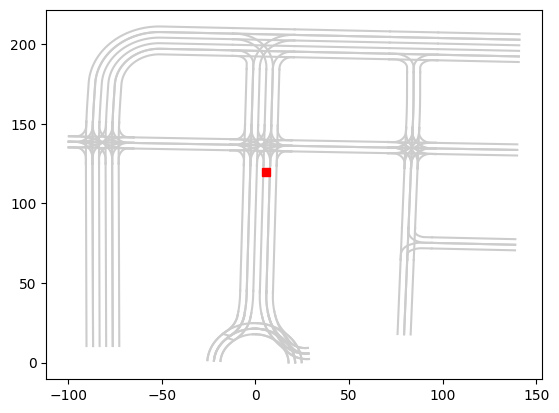

In [97]:
for road_id in neighborhood_road_ids:
    plt.plot(roads[road_id].l_bound[:,0], roads[road_id].l_bound[:,1], color='0.8')#, marker='o', markerfacecolor='blue', markersize=5)
    plt.plot(roads[road_id].r_bound[:,0], roads[road_id].r_bound[:,1], color='0.8')#, marker='o', markerfacecolor='red', markersize=5)
plt.plot(cav_x, cav_y, marker="s", color="r")